# Summary of Tasks 1-7
---
This notebook summarises the codes and commands used to complete tasks 1-7

## Task 1
---

Task 1 was to create a folder 'data' at the root of the repository and two subdirectories - timestamps and weather. I used the [mkdir command][1] to do this. However I accidently made the weather folder a subdirectory of the data/timestamps folder. Also created data2 as I deleted data but was unable to use the same name.

**Command I used:** 
``` bash

mkdir data2  #mkdir command is used to make directories and subdirectories.

mkdir data2/timestamps  #makes the timestamps subdirectory, the forward slash indicates a new directory

mkdir data2/timestamps/weather  #makes the weather subdirectory within the data2/timestamps directory

```
**What I should have done:**
``` bash

mkdir data2

mkdir data2/timestamps

mkdir data2/weather
```

Both timestamps and weather would have been subdirectories of data2 rather than wetaher being a subdirectory of data2/timestamps.





[1]: https://ubuntu.com/tutorials/command-line-for-beginners#4-creating-folders-and-files

## Task 2
---

Task 2 was to use the 'date' command to output the current date and time then append it into a file called 'now.txt'.

**date**  #outputs the day in three letter format, the month in three letter format, the day of the month, the time in HHMMSS format and the year. This was done 10 times.

The output of the date command was to be appended in a txt file in the data2/timestamps directory so I changed directories with the command cd:
    
    cd data2/timestamps

To append an output into a file use the >> operator and the name of the file you want to create and append the output into. The >> operator can create a new file if it doesn't already exist and doesn't overwrite the file if it does exist.

**Command I used:**
    
    date >> now.txt

The command **more** can be used to display the contents of the file. This command was used to ensure the previous command had the expected result:
    
    more now.txt

## Task 3
---

The date command was ran again but instead it was formatted as YYYYmmdd_HHMMSS. The date man page has all the formatting options. 

Year = %Y
Month = %m
Day = %d
Hour = %H
Minute =%M
Second = %S

To format the date the command used is:
    
    date +"%Y%m%d_%H%M%S"

And it was appended to a txt file called formatted.txt with the command:
    
    date +"%Y%m%d_%H%M%S" >> formatted.txt

## Task 4
---
Task 4 repeated task 3 but using the **touch** command to create a new empty file. The file name is in the YYYYmmdd_HHMMSS format and this is done by embedding the **date +format** into something called backticks (``). [Backticks work by carrying out the command in the backticks first before the main command runs and its output being used by the command as a parameter][1]. In the case of this command, the main command is the touch command but the date +format command in backticks will be executed first by becoming the name of the file created. 

The full command used:
    
    touch `date +"%Y%m%d_%H%M%S"` 






[1]: https://www.techopedia.com/definition/17836/backtick

## Task 5
---
To switch to work in the weather subdirectory I used the command:
    cd data2/timestamps/weather

In this task the weather data for the Athenry weather station was downloaded using the wget command. [wget is non-interactive network downloader that can download files from a server even when the user is not logged on and downloads with hindering the current process hence it being non-interactive][1].

When you download a file with wget it saves the file a name from the URL by default. [This can be changed by passing the command -O][2]:
    
    wget -O <filename><URL>

The -O gives the option of saving the file with a different name. To save the filename as weather.json the command is as follows:
    
    wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today





[1]: https://www.geeksforgeeks.org/wget-command-in-linux-unix/
[2]: https://www.geeksforgeeks.org/linux-renaming-file-while-downloading-with-wget/?ref=oin_asr1

## Task 6
---
Task 6 is to modify Task 5 by saving the downloaded file as YYYYmmdd_HHMMSS.json. This uses the command from task 4 where the date +format command is passed through first by the use of backticks.

The new command for Task 6 is as follows:
    
    wget -O `date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today


## Task 7
---
Task 7 is to write a bash script called weather.sh that automates the process from Task 6 and saves the file in the data2/timestamps/weather directory.

To write a bash script the command #! (shebang) has to be passed through. [A shebang is a character sequence at the beginning of a script file that informs the operating system which interpreter to use for executing the script. For a bash script the line typically used is '#! bin/bash'. This line tells the operating system to use the Bash interpreter located at /bin/bash to run the script. The script used for this command is the command for task 6 with the added directory for where the script is to saved][1]. Writing the script is as follows:

    #! /bin/bash

    wget -O data2/timestamps/weather `date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today

However when we run this ./weather.sh it says that we don't have permission.
To make the script executable we use chmod u+x #chmod = change mode, u = user, x = executable. The command is as follows:
    
    chmod u+x ./weather.sh

When ./weather.sh is ran again, the command is executed.


[1]: https://medium.com/@redswitches/shebang-in-bash-and-python-scripts-best-practices-8c0a0b42c176

## End of Task Summaries

# Weather Analysis
---
Below is a brief summary and explanation of a weather data file taken from Met Eireann.

In [1]:
# Data frames
import pandas as pd

In [2]:
# Read in the data
df = pd.read_json('data2/timestamps/weather/20241117_152204.json')

In [3]:
# Show the data
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,6,04n,Cloudy,"""Cloudy""",9,-,W,270,89,0.00,1021,Sunday,2024-11-17,00:00
1,Athenry,7,04n,Cloudy,"""Cloudy""",4,-,W,270,90,0.00,1020,Sunday,2024-11-17,01:00
2,Athenry,7,04n,Cloudy,"""Cloudy""",7,-,W,270,89,0.00,1020,Sunday,2024-11-17,02:00
3,Athenry,7,04n,Cloudy,"""Cloudy""",6,-,W,270,90,0.00,1020,Sunday,2024-11-17,03:00
4,Athenry,8,04n,Cloudy,"""Cloudy""",6,-,W,270,90,0.00,1019,Sunday,2024-11-17,04:00
5,Athenry,8,04n,Cloudy,"""Cloudy""",7,-,W,270,90,0.00,1019,Sunday,2024-11-17,05:00
6,Athenry,8,04n,Cloudy,"""Cloudy""",7,-,W,270,90,0.00,1018,Sunday,2024-11-17,06:00
7,Athenry,8,04n,Cloudy,"""Cloudy""",7,-,W,270,92,0.00,1018,Sunday,2024-11-17,07:00
8,Athenry,9,04d,Cloudy,"""Cloudy""",7,-,SW,225,93,0.00,1018,Sunday,2024-11-17,08:00
9,Athenry,9,04d,Cloudy,"""Cloudy""",7,-,W,270,92,0.00,1017,Sunday,2024-11-17,09:00


In [4]:
import matplotlib.pyplot as plt

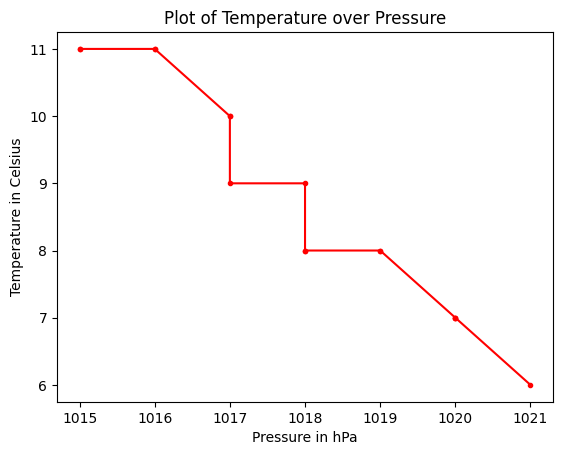

In [7]:
#time = df['reportTime']
temperature = df['temperature']
pressure = df['pressure']

# Create a line plot
plt.plot(pressure, temperature, color = 'r', marker = '.')
plt.xlabel('Pressure in hPa')
plt.ylabel('Temperature in Celsius')
plt.title('Plot of Temperature over Pressure')

#plt.grid(True)

# Show the plot
plt.show()

The above plot is of the pressure and temperature readings taken every hour on the 17th of November up until 15:00 that day. For the most part, the graph shows that an increase in pressure leads to a decrease in temperature. Generally speaking, an increase in pressure leads to a increase in temperature and a decrease in pressure leads to a decrease in temperature hence why the air get colder at higher altitudes [1]. Ireland experiences a range of air masses from different sources causing the variable weather. Low pressure systems or depressions often move north eastwards across the North Atlantic and pass to the northwest of Ireland. Ahead of the depression centres, warm moist air is swept northwards while behind them colder, drier air is swept southwards. giving the sequence of cloudy, humid weather with rain, followed by brighter, colder weather with showers [2]. The weather in Athenry on this day was mainly cloudy with a period of light rain or drizzle. 

[1]: https://scied.ucar.edu/learning-zone/how-weather-works/highs-and-lows-air-pressure#:~:text=For%20example%2C%20if%20air%20pressure,altitudes%2C%20where%20pressure%20is%20lower.
[2]: https://www.met.ie/climate/climate-of-ireland